<a href="https://colab.research.google.com/github/SBGuillermo/TFM-AnalisisComercio/blob/main/Notebooks/2_Analisis_cualitativo_datset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis cualititavo del dataset

vamos a anliazar los datos del data set para extraer conclusiones sobre cuando y en que cantidad se vende más

por limitaciones en el tamaño de un ùnico archivo de github tenemos que descargarnos dos tablas y unirlas

In [2]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sbn

plt.style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib


In [3]:
!wget https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table1.csv

--2021-07-08 10:14:05--  https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17889332 (17M) [text/plain]
Saving to: ‘Table1.csv’

Table1.csv          100%[===================>]  17.06M  27.0MB/s    in 0.6s    

2021-07-08 10:14:06 (27.0 MB/s) - ‘Table1.csv’ saved [17889332/17889332]



In [4]:
!wget https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table2.csv

--2021-07-08 10:14:06--  https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17784301 (17M) [text/plain]
Saving to: ‘Table2.csv’

Table2.csv          100%[===================>]  16.96M  27.5MB/s    in 0.6s    

2021-07-08 10:14:07 (27.5 MB/s) - ‘Table2.csv’ saved [17784301/17784301]



In [5]:
df1 = pd.read_csv('/content/Table1.csv')
df1

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,285947,561967,22400,other,3,2011-08-01 13:11:00,0.39,12844.0,United Kingdom,1.17
199996,199996,285948,561967,82482,WOODEN PICTURE FRAME WHITE FINISH,5,2011-08-01 13:11:00,2.55,12844.0,United Kingdom,12.75
199997,199997,285949,561967,82551,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35
199998,199998,285950,561967,82552,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35


In [6]:
df2 = pd.read_csv('/content/Table2.csv')
df2

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,200000,285952,561967,23306,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35
1,200001,285953,561967,47504H,other,1,2011-08-01 13:11:00,0.79,12844.0,United Kingdom,0.79
2,200002,285954,561967,21907,other,6,2011-08-01 13:11:00,2.10,12844.0,United Kingdom,12.60
3,200003,285955,561967,21992,other,3,2011-08-01 13:11:00,1.25,12844.0,United Kingdom,3.75
4,200004,285956,561967,21754,other,2,2011-08-01 13:11:00,5.95,12844.0,United Kingdom,11.90
...,...,...,...,...,...,...,...,...,...,...,...
197919,397919,541904,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
197920,397920,541905,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
197921,397921,541906,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
197922,397922,541907,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [7]:
df = pd.concat([df1,df2], axis=0)
df

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...
197919,397919,541904,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
197920,397920,541905,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
197921,397921,541906,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
197922,397922,541907,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [8]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
197919,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
197920,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
197921,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
197922,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [9]:
df4 = df

Para procesar los datos más adelante, dividimos la fecha de compra en dos columnas, una con el dia y otra con la hora

In [10]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["day"] = df["InvoiceDate"].dt.date
df["hour"] = df["InvoiceDate"].dt.time
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00
1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00
3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
...,...,...,...,...,...,...,...,...,...,...,...
197919,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09,12:50:00
197920,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09,12:50:00
197921,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12:50:00
197922,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12:50:00


In [11]:
df = df.drop(['InvoiceDate'], axis=1)

In [12]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,PrecioTotal,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00
1,536365,71053,other,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
2,536365,84406B,other,8,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00
3,536365,84029G,other,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
4,536365,84029E,other,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
...,...,...,...,...,...,...,...,...,...,...
197919,581587,22613,other,12,0.85,12680.0,France,10.20,2011-12-09,12:50:00
197920,581587,22899,other,6,2.10,12680.0,France,12.60,2011-12-09,12:50:00
197921,581587,23254,other,4,4.15,12680.0,France,16.60,2011-12-09,12:50:00
197922,581587,23255,other,4,4.15,12680.0,France,16.60,2011-12-09,12:50:00


## Análisis de los meses y horas de máxima compra

una vez tenemos todos los datos procesados, crearemos representaciones gráficas de esos datos

In [59]:
mx_time = df.drop(['StockCode','Description','Quantity','CustomerID', 'UnitPrice','Country','PrecioTotal', 'day'], axis=1)
mx_time

,InvoiceNo,hour
0,536365,08:26:00
1,536365,08:26:00
2,536365,08:26:00
3,536365,08:26:00
4,536365,08:26:00
...,...,...
197919,581587,12:50:00
197920,581587,12:50:00
197921,581587,12:50:00
197922,581587,12:50:00


In [60]:
mx_time_gb = mx_time.groupby('hour').count()
mx_time_gb

,InvoiceNo
hour,
06:20:00,1
07:35:00,43
07:36:00,27
07:37:00,26
07:38:00,23
...,...
20:09:00,137
20:12:00,66
20:13:00,125


In [15]:
sbn.set(rc={'figure.figsize':(10, 5)})

Text(0, 0.5, 'numbers of items sold')

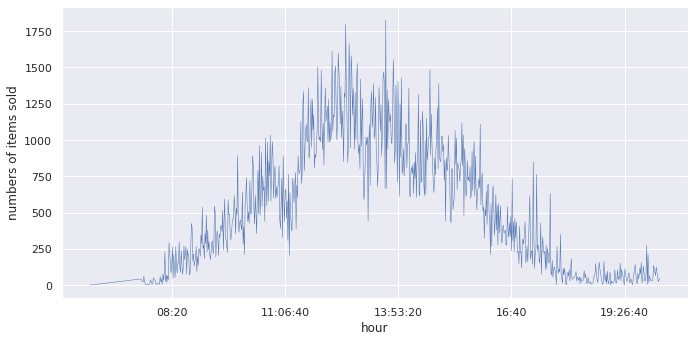

In [16]:
mx_time_gb['InvoiceNo'].plot(linewidth=0.5)
plt.ylabel('numbers of items sold')

el resultado de la grafica es demasiado confuso como para na buena interpretación, por lo que crearemos una tabla nueva donde solo tendremos en cuenta la hora (sin minutos) y el año y el mes

In [17]:
df4["InvoiceDate"] = pd.to_datetime(df4["InvoiceDate"])
df4["date"] = df4["InvoiceDate"].dt.strftime("%Y-%m")
df4["month"] = df4["InvoiceDate"].dt.strftime("%m")
df4["year"] = df4["InvoiceDate"].dt.strftime("%Y")
df4["hour"] = df4["InvoiceDate"].dt.strftime("%H")
df4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal,day,hour,date,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08,2010-12,12,2010
1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08,2010-12,12,2010
2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08,2010-12,12,2010
3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08,2010-12,12,2010
4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08,2010-12,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197919,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09,12,2011-12,12,2011
197920,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09,12,2011-12,12,2011
197921,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12,2011-12,12,2011
197922,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12,2011-12,12,2011


In [18]:
mx_time2 = df4.drop(['StockCode','Description','Quantity','UnitPrice','Country','CustomerID','InvoiceDate', 'day'], axis=1)
mx_time2

,InvoiceNo,PrecioTotal,hour,date,month,year
0,536365,15.30,08,2010-12,12,2010
1,536365,20.34,08,2010-12,12,2010
2,536365,22.00,08,2010-12,12,2010
3,536365,20.34,08,2010-12,12,2010
4,536365,20.34,08,2010-12,12,2010
...,...,...,...,...,...,...
197919,581587,10.20,12,2011-12,12,2011
197920,581587,12.60,12,2011-12,12,2011
197921,581587,16.60,12,2011-12,12,2011
197922,581587,16.60,12,2011-12,12,2011


In [61]:
mx_time_gbe = mx_time2.groupby(['InvoiceNo','date', 'month', 'year', 'hour'], as_index=False).sum()
mx_time_gbe

,InvoiceNo,date,month,year,hour,PrecioTotal
0,536365,2010-12,12,2010,08,139.12
1,536366,2010-12,12,2010,08,22.20
2,536367,2010-12,12,2010,08,278.73
3,536368,2010-12,12,2010,08,70.05
4,536369,2010-12,12,2010,08,17.85
...,...,...,...,...,...,...
18532,581583,2011-12,12,2011,12,124.60
18533,581584,2011-12,12,2011,12,140.64
18534,581585,2011-12,12,2011,12,329.05
18535,581586,2011-12,12,2011,12,339.20


In [62]:
mx_time_gbe2 = mx_time_gbe.drop('PrecioTotal', axis=1)
mx_time_gbe2 = mx_time_gbe.groupby(['date', 'month', 'year', 'hour'], as_index=False).count()
mx_time_gbe2

,date,month,year,hour,InvoiceNo,PrecioTotal
0,2010-12,12,2010,07,2,2
1,2010-12,12,2010,08,26,26
2,2010-12,12,2010,09,101,101
3,2010-12,12,2010,10,168,168
4,2010-12,12,2010,11,173,173
...,...,...,...,...,...,...
171,2011-12,12,2011,16,58,58
172,2011-12,12,2011,17,31,31
173,2011-12,12,2011,18,13,13
174,2011-12,12,2011,19,9,9


Text(0.5, 0, 'month')

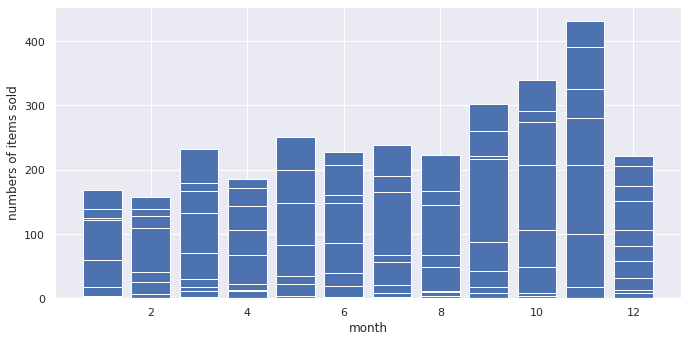

In [63]:
plt.bar(mx_time_gbe2.month.astype('int'), mx_time_gbe2.InvoiceNo )
plt.ylabel('numbers of items sold')
plt.xlabel('month')

Text(0.5, 0, 'hour')

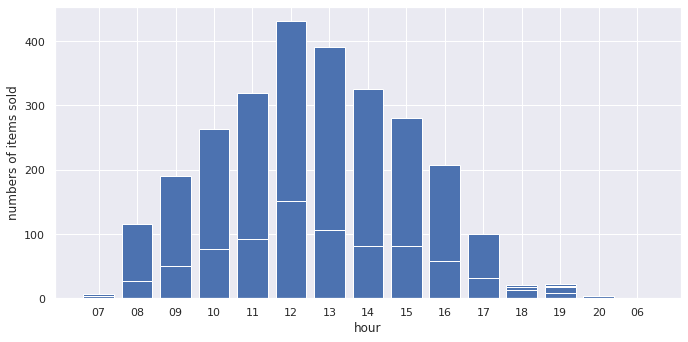

In [64]:
plt.bar(mx_time_gbe2.hour, mx_time_gbe2.InvoiceNo )
plt.ylabel('numbers of items sold')
plt.xlabel('hour')

## Comparación entre el precio de la compra y el número de objetos vendidos

In [22]:
inc_year_money = mx_time2.groupby('year', as_index=False).sum()
inc_year_money = inc_year_money.drop(['InvoiceNo'], axis=1)
inc_year_money

,year,PrecioTotal
0,2010,5.727139e+05
1,2011,8.338694e+06


In [23]:
inc_year_obj = mx_time_gb2.groupby('year', as_index=False).sum()
inc_year_obj = inc_year_obj.drop(['PrecioTotal'], axis=1)
inc_year_obj

,year,InvoiceNo
0,2010,26160
1,2011,371764


In [24]:
inc_year = pd.merge(inc_year_money, inc_year_obj, on='year')
inc_year

,year,PrecioTotal,InvoiceNo
0,2010,5.727139e+05,26160
1,2011,8.338694e+06,371764


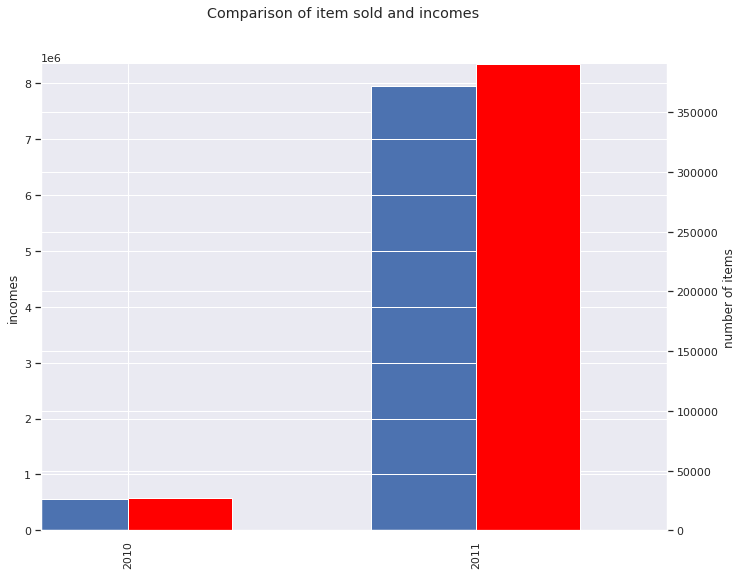

In [25]:
fig = plt.figure()
fig.set_size_inches(10,8)
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

inc_year.InvoiceNo.plot(kind='bar', ax=ax1, width= 0.5,position=.6)
inc_year.PrecioTotal.plot(kind='bar', ax=ax2, width= 0.3, color='red' ,position=0)

ax2.set_ylim(0, 8.338694e+06)
ax1.yaxis.set_label_position('right')
ax1.yaxis.tick_right()
ax2.yaxis.set_label_position('left')
ax2.yaxis.tick_left()
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

fig.suptitle('Comparison of item sold and incomes')
ax2.set_ylabel('incomes')
ax1.set_ylabel('number of items')
ax1.set_xticklabels(['2010','2011'])

plt.show()


* No se pueden comparar los beneficios de ambos años ya que no disponemos de todos los datos del año 2010

In [26]:
one_month = df4
one_month

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal,day,hour,date,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08,2010-12,12,2010
1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08,2010-12,12,2010
2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08,2010-12,12,2010
3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08,2010-12,12,2010
4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08,2010-12,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197919,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09,12,2011-12,12,2011
197920,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09,12,2011-12,12,2011
197921,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12,2011-12,12,2011
197922,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12,2011-12,12,2011


In [27]:
one_month2010 = one_month[one_month['date']=='2010-12']
one_month2010

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal,day,hour,date,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08,2010-12,12,2010
1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08,2010-12,12,2010
2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08,2010-12,12,2010
3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08,2010-12,12,2010
4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08,2010-12,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26155,539988,84380,other,1,2010-12-23 16:06:00,1.25,18116.0,United Kingdom,1.25,2010-12-23,16,2010-12,12,2010
26156,539988,84849D,other,1,2010-12-23 16:06:00,1.69,18116.0,United Kingdom,1.69,2010-12-23,16,2010-12,12,2010
26157,539988,84849B,other,1,2010-12-23 16:06:00,1.69,18116.0,United Kingdom,1.69,2010-12-23,16,2010-12,12,2010
26158,539988,22854,other,2,2010-12-23 16:06:00,4.95,18116.0,United Kingdom,9.90,2010-12-23,16,2010-12,12,2010


In [28]:
one_month2011 = one_month[one_month['date']=='2011-12']
one_month2011

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal,day,hour,date,month,year
180620,579899,23301,other,24,2011-12-01 08:33:00,1.65,15687.0,United Kingdom,39.60,2011-12-01,08,2011-12,12,2011
180621,579899,22623,other,3,2011-12-01 08:33:00,5.95,15687.0,United Kingdom,17.85,2011-12-01,08,2011-12,12,2011
180622,579899,20970,other,4,2011-12-01 08:33:00,3.75,15687.0,United Kingdom,15.00,2011-12-01,08,2011-12,12,2011
180623,579899,23562,other,6,2011-12-01 08:33:00,2.89,15687.0,United Kingdom,17.34,2011-12-01,08,2011-12,12,2011
180624,579899,71477,other,4,2011-12-01 08:33:00,3.95,15687.0,United Kingdom,15.80,2011-12-01,08,2011-12,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197919,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09,12,2011-12,12,2011
197920,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09,12,2011-12,12,2011
197921,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12,2011-12,12,2011
197922,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12,2011-12,12,2011


In [29]:
one_month = pd.concat([one_month2010,one_month2011], axis=0)
one_month

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal,day,hour,date,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08,2010-12,12,2010
1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08,2010-12,12,2010
2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08,2010-12,12,2010
3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08,2010-12,12,2010
4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08,2010-12,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197919,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09,12,2011-12,12,2011
197920,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09,12,2011-12,12,2011
197921,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12,2011-12,12,2011
197922,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12,2011-12,12,2011


In [30]:
one_month = one_month.drop(['StockCode','Description','Quantity','UnitPrice','Country','CustomerID','InvoiceDate', 'day'], axis=1)
one_month

,InvoiceNo,PrecioTotal,hour,date,month,year
0,536365,15.30,08,2010-12,12,2010
1,536365,20.34,08,2010-12,12,2010
2,536365,22.00,08,2010-12,12,2010
3,536365,20.34,08,2010-12,12,2010
4,536365,20.34,08,2010-12,12,2010
...,...,...,...,...,...,...
197919,581587,10.20,12,2011-12,12,2011
197920,581587,12.60,12,2011-12,12,2011
197921,581587,16.60,12,2011-12,12,2011
197922,581587,16.60,12,2011-12,12,2011


In [31]:
one_month_gb = one_month.groupby(['hour','date', 'month', 'year', 'PrecioTotal'], as_index=False).count()
one_month_gb

,hour,date,month,year,PrecioTotal,InvoiceNo
0,07,2010-12,12,2010,13.60,1
1,07,2010-12,12,2010,15.00,2
2,07,2010-12,12,2010,30.00,1
3,07,2010-12,12,2010,30.60,1
4,07,2010-12,12,2010,45.00,1
...,...,...,...,...,...,...
6682,20,2011-12,12,2011,3.75,1
6683,20,2011-12,12,2011,4.95,2
6684,20,2011-12,12,2011,5.75,1
6685,20,2011-12,12,2011,8.25,1


In [32]:
inc_year_money_month = one_month.groupby('year', as_index=False).sum()
inc_year_money_month = inc_year_money_month.drop(['InvoiceNo'], axis=1)
inc_year_money_month

,year,PrecioTotal
0,2010,572713.89
1,2011,518192.79


In [33]:
inc_year_obj_month = one_month_gb.groupby('year', as_index=False).sum()
inc_year_obj_month = inc_year_obj_month.drop(['PrecioTotal'], axis=1)
inc_year_obj_month

,year,InvoiceNo
0,2010,26160
1,2011,17304


In [34]:
inc_year_month = pd.merge(inc_year_money_month, inc_year_obj_month, on='year')
inc_year_month

,year,PrecioTotal,InvoiceNo
0,2010,572713.89,26160
1,2011,518192.79,17304


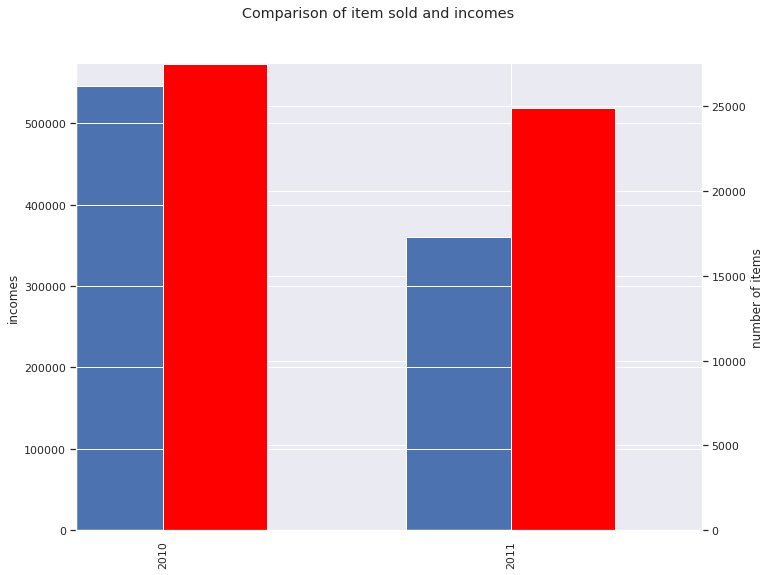

In [35]:
fig = plt.figure()
fig.set_size_inches(10,8)
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

inc_year_month.InvoiceNo.plot(kind='bar', ax=ax1, width= 0.5,position=.6)
inc_year_month.PrecioTotal.plot(kind='bar', ax=ax2, width= 0.3, color='red' ,position=0)

ax2.set_ylim(0, 572714)
ax1.yaxis.set_label_position('right')
ax1.yaxis.tick_right()
ax2.yaxis.set_label_position('left')
ax2.yaxis.tick_left()
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

fig.suptitle('Comparison of item sold and incomes')
ax2.set_ylabel('incomes')
ax1.set_ylabel('number of items')
ax1.set_xticklabels(['2010','2011'])

plt.show()

## Top 10 items

ahora buscaremos los objetos más vendidos en la tienda

In [36]:
TopTen = df.groupby('Description', as_index=False).sum()
TopTen

,Description,InvoiceNo,Quantity,UnitPrice,CustomerID,PrecioTotal
0,ALARM CLOCK BAKELIKE RED,503216047,7221,3.386270e+03,1.376994e+07,2.592520e+04
1,ASSORTED COLOUR BIRD ORNAMENT,787571851,35362,2.366560e+03,2.145027e+07,5.658034e+04
2,HEART OF WICKER SMALL,549327883,16775,1.614900e+03,1.522909e+07,2.822864e+04
3,JAM MAKING SET WITH JARS,493683057,8162,3.710960e+03,1.350678e+07,3.266297e+04
4,JUMBO BAG PINK POLKADOT,497622814,20165,1.796560e+03,1.364513e+07,3.728959e+04
5,JUMBO BAG RED RETROSPOT,905743809,46181,3.261690e+03,2.474836e+07,8.522078e+04
6,LUNCH BAG BLACK SKULL.,619025922,11291,1.816450e+03,1.714567e+07,1.802455e+04
7,LUNCH BAG APPLE DESIGN,503323533,11565,1.469150e+03,1.366901e+07,1.827825e+04
8,LUNCH BAG CARS BLUE,553227867,10820,1.638650e+03,1.522557e+07,1.726568e+04
9,LUNCH BAG PINK POLKADOT,534861786,10254,1.580690e+03,1.472661e+07,1.634950e+04


In [37]:
TopTen = TopTen.sort_values('InvoiceNo',ascending=False)
TopTen

,Description,InvoiceNo,Quantity,UnitPrice,CustomerID,PrecioTotal
25,other,207359636605,4804728,1.121466e+06,5.657408e+09,7.938411e+06
23,WHITE HANGING HEART T-LIGHT HOLDER,1128919171,36725,5.867220e+03,3.156207e+07,1.004481e+05
18,REGENCY CAKESTAND 3 TIER,960245618,12412,2.150890e+04,2.580689e+07,1.425929e+05
5,JUMBO BAG RED RETROSPOT,905743809,46181,3.261690e+03,2.474836e+07,8.522078e+04
1,ASSORTED COLOUR BIRD ORNAMENT,787571851,35362,2.366560e+03,2.145027e+07,5.658034e+04
16,PARTY BUNTING,778643972,15295,6.807420e+03,2.148090e+07,6.884433e+04
10,LUNCH BAG RED RETROSPOT,735382120,17697,2.183200e+03,2.003002e+07,2.804845e+04
20,SET OF 3 CAKE TINS PANTRY DESIGN,646272492,7020,5.741240e+03,1.770063e+07,3.334780e+04
6,LUNCH BAG BLACK SKULL.,619025922,11291,1.816450e+03,1.714567e+07,1.802455e+04
17,POSTAGE,615551699,3120,3.469596e+04,1.401503e+07,7.780396e+04


In [38]:
TopTen = TopTen.iloc[:12]
TopTen

,Description,InvoiceNo,Quantity,UnitPrice,CustomerID,PrecioTotal
25,other,207359636605,4804728,1.121466e+06,5.657408e+09,7.938411e+06
23,WHITE HANGING HEART T-LIGHT HOLDER,1128919171,36725,5.867220e+03,3.156207e+07,1.004481e+05
18,REGENCY CAKESTAND 3 TIER,960245618,12412,2.150890e+04,2.580689e+07,1.425929e+05
5,JUMBO BAG RED RETROSPOT,905743809,46181,3.261690e+03,2.474836e+07,8.522078e+04
1,ASSORTED COLOUR BIRD ORNAMENT,787571851,35362,2.366560e+03,2.145027e+07,5.658034e+04
16,PARTY BUNTING,778643972,15295,6.807420e+03,2.148090e+07,6.884433e+04
10,LUNCH BAG RED RETROSPOT,735382120,17697,2.183200e+03,2.003002e+07,2.804845e+04
20,SET OF 3 CAKE TINS PANTRY DESIGN,646272492,7020,5.741240e+03,1.770063e+07,3.334780e+04
6,LUNCH BAG BLACK SKULL.,619025922,11291,1.816450e+03,1.714567e+07,1.802455e+04
17,POSTAGE,615551699,3120,3.469596e+04,1.401503e+07,7.780396e+04


In [39]:
TopTen = TopTen.drop(['UnitPrice','InvoiceNo','CustomerID','PrecioTotal'], axis=1)
TopTen

,Description,Quantity
25,other,4804728
23,WHITE HANGING HEART T-LIGHT HOLDER,36725
18,REGENCY CAKESTAND 3 TIER,12412
5,JUMBO BAG RED RETROSPOT,46181
1,ASSORTED COLOUR BIRD ORNAMENT,35362
16,PARTY BUNTING,15295
10,LUNCH BAG RED RETROSPOT,17697
20,SET OF 3 CAKE TINS PANTRY DESIGN,7020
6,LUNCH BAG BLACK SKULL.,11291
17,POSTAGE,3120


In [40]:
TopTen = TopTen.reset_index()

Tenemos que eliminar el objeto 'otro' y el 'POSTAGE' ya que no nos interesan en este análisis

In [41]:
TopTen = TopTen.drop([0, 9], axis=0)

In [42]:
TopTen = TopTen.sort_values('Quantity',ascending=False)
TopTen

,index,Description,Quantity
3,5,JUMBO BAG RED RETROSPOT,46181
1,23,WHITE HANGING HEART T-LIGHT HOLDER,36725
4,1,ASSORTED COLOUR BIRD ORNAMENT,35362
10,14,PACK OF 72 RETROSPOT CAKE CASES,33693
6,10,LUNCH BAG RED RETROSPOT,17697
11,15,PAPER CHAIN KIT 50'S CHRISTMAS,15617
5,16,PARTY BUNTING,15295
2,18,REGENCY CAKESTAND 3 TIER,12412
8,6,LUNCH BAG BLACK SKULL.,11291
7,20,SET OF 3 CAKE TINS PANTRY DESIGN,7020


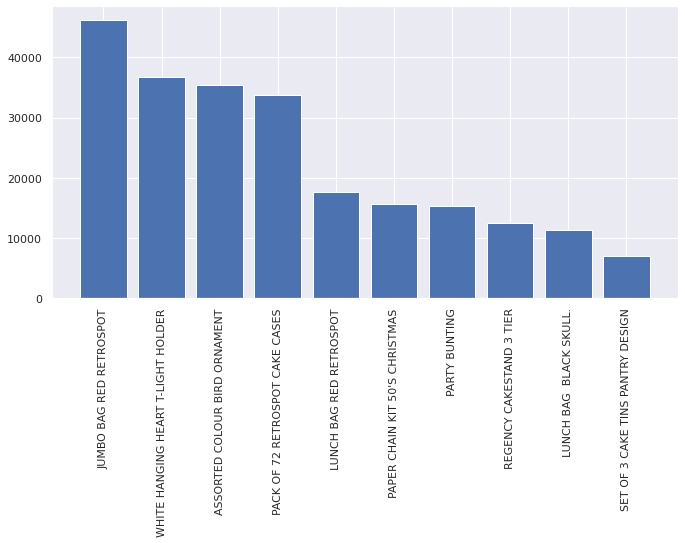

In [43]:
plt.bar(TopTen.Description, TopTen.Quantity)
plt.xticks(rotation= 90 )
plt.show()

## Conclusiones

1.   debido al tipo de tienda que es, el horario central de día es el más concurrido de todos

2.   Por el mismo motivos que el anterior, las ventas se disparan segun se van acercando las navidades

3.   En comparación de los meses de diciembre de ambos años, llegamos a la conclusión de que el aunque en el año 2010 se vendieron una gran cantidad más de objetos, los ingresos producidos son practicamente los mismos

4.   La mayor venta de productos se produce en los elementos de fiesta y en bolsas para portar comida. Elementos pequeños y de escaso valor pero que se venden en grandes cantidades







